In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal, mannwhitneyu
import matplotlib.pyplot as plt

liwc = pd.read_csv('../output/LIWC.csv')
liwc.drop(['Unnamed: 0', 'Unnamed: 0.1', 'objective'], axis=1, inplace=True)

In [2]:
liwc_vars = liwc.columns[18:].to_list()
connection = ['inquisition', 'disclosure']
subject = ['dependency', 'recovery', 'other']
objectives = ['Quality', 'Legality', 'Effects', 'Methods of Ingestion', 'Combination of Substances', 'Mental Health',
          'N/A', 'Other', 'Overdose', 'Nurturant Support & Morality', 'Withdrawal', 'Safety', 'Relapse']
# to lower
objectives = [x.lower() for x in objectives]
# determine which liwc categories are significant
# manwhitneyu test for inquisition vs disclosure since there are only 2 groups
results_c = []
for c in liwc_vars:
    results_c.append([c, 
                    mannwhitneyu(liwc[liwc['connection'] == 'inquisition'][c],
                                    liwc[liwc['connection'] == 'disclosure'][c]).statistic,
                    mannwhitneyu(liwc[liwc['connection'] == 'inquisition'][c],
                                 liwc[liwc['connection'] == 'disclosure'][c]).pvalue])

In [3]:
# correct pvalues with benjamini-hochberg
from statsmodels.stats.multitest import multipletests, fdrcorrection
results_c_df = pd.DataFrame(results_c, columns=['category', 'statistic', 'pvalue'])
results_c_df['pvalue_corrected'] = fdrcorrection(results_c_df['pvalue'])[1]
results_c_df['significant'] = results_c_df['pvalue_corrected'] < 0.05


In [3]:
# store significant categories
# results_c_sig = [x for x in results_c if x[2] < 0.05]
# sig_cats = [x[0] for x in results_c if x[2] < 0.05]

In [4]:
# get effect sizes - cohens d
sig_cats = results_c_df[results_c_df['significant']]['category'].to_list()
cohens_d = []
for c in sig_cats:
    inq = liwc[liwc['connection'] == 'inquisition'][c]
    dis = liwc[liwc['connection'] == 'disclosure'][c]
    cohens_d.append([c, (inq.mean() - dis.mean()) / (inq.std() + dis.std())])

In [5]:
liwc_ratio = []
for c in cohens_d:
    inq = liwc[liwc['connection'] == 'inquisition'][c[0]].mean()
    dis = liwc[liwc['connection'] == 'disclosure'][c[0]].mean()
    liwc_ratio.append([c[0], inq/dis])

In [6]:
# combine manwhitney and cohensd and export
# connection_analysis = pd.DataFrame(results_c_sig, columns=['category', 'statistic', 'pvalue'])
connection_analysis = results_c_df[results_c_df['significant']]
connection_analysis['cohens_d'] = [x[1] for x in cohens_d]
connection_analysis['ratio'] = [x[1] for x in liwc_ratio]
connection_analysis.to_csv('../output/connection_analysis_CORRECTED.csv')

/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_56352/754168063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connection_analysis['cohens_d'] = [x[1] for x in cohens_d]
/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_56352/754168063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connection_analysis['ratio'] = [x[1] for x in liwc_ratio]


---

## Subject - ALL & RECOVERY VS DEPENDENCY


In [8]:
# difference in means
results_s = []
for c in liwc_vars:
    results_s.append([c, 
                    mannwhitneyu(liwc[liwc['subjective'] == 'dependency'][c],
                                    liwc[liwc['subjective'] == 'recovery'][c]).statistic,
                    mannwhitneyu(liwc[liwc['subjective'] == 'dependency'][c],
                                 liwc[liwc['subjective'] == 'recovery'][c]).pvalue])

# correct pvalues with benjamini-hochberg
results_s_df = pd.DataFrame(results_s, columns=['category', 'statistic', 'pvalue'])
results_s_df['pvalue_corrected'] = fdrcorrection(results_s_df['pvalue'])[1]
results_s_df['significant'] = results_s_df['pvalue_corrected'] < 0.05


# results_s_sig = [x for x in results_s if x[2] < 0.05]
# sig_cats_s = [x[0] for x in results_s if x[2] < 0.05]

In [9]:
sig_cats_s = results_s_df[results_s_df['significant']]['category'].to_list()
cohens_d_s_rec = []
for c in sig_cats_s:
    dep = liwc[liwc['subjective'] == 'dependency'][c]
    rec = liwc[liwc['subjective'] == 'recovery'][c]
    cohens_d_s_rec.append([c, (rec.mean() - dep.mean()) / (rec.std() + dep.std())])

In [10]:
# ratio
liwc_ratio_s = []
for c in cohens_d_s_rec:
    dep = liwc[liwc['subjective'] == 'dependency'][c[0]].mean()
    rec = liwc[liwc['subjective'] == 'recovery'][c[0]].mean()
    liwc_ratio_s.append([c[0], rec/dep])

In [11]:
# merge
# subjective_analysis = pd.DataFrame(results_s_sig, columns=['category', 'statistic', 'pvalue'])
subjective_analysis = results_s_df[results_s_df['significant']]
subjective_analysis['cohens_d'] = [x[1] for x in cohens_d_s_rec]
subjective_analysis['ratio'] = [x[1] for x in liwc_ratio_s]
subjective_analysis.to_csv('../output/subjective_analysis_CORRECTED.csv')

In [12]:
# inquisition
liwc_inq = liwc[liwc['connection'] == 'inquisition']
results_inq_s = []
for c in liwc_vars:
    results_inq_s.append([c, 
                    mannwhitneyu(liwc_inq[liwc_inq['subjective'] == 'dependency'][c],
                                    liwc_inq[liwc_inq['subjective'] == 'recovery'][c]).statistic,
                    mannwhitneyu(liwc_inq[liwc_inq['subjective'] == 'dependency'][c],
                                 liwc_inq[liwc_inq['subjective'] == 'recovery'][c]).pvalue])
    
# correct pvalues with benjamini-hochberg
results_inq_s_df = pd.DataFrame(results_inq_s, columns=['category', 'statistic', 'pvalue'])
results_inq_s_df['pvalue_corrected'] = fdrcorrection(results_inq_s_df['pvalue'])[1]
results_inq_s_df['significant'] = results_inq_s_df['pvalue_corrected'] < 0.05

# results_inq_s_sig = [x for x in results_inq_s if x[2] < 0.05]
# sig_cats_inq_s = [x[0] for x in results_inq_s if x[2] < 0.05]

In [13]:
sig_cats_inq_s = results_inq_s_df[results_inq_s_df['significant']]['category'].to_list()

cohens_d_inq_s_rec = []
for c in sig_cats_inq_s:
    dep = liwc_inq[liwc_inq['subjective'] == 'dependency'][c]
    rec = liwc_inq[liwc_inq['subjective'] == 'recovery'][c]
    cohens_d_inq_s_rec.append([c, (rec.mean() - dep.mean()) / (rec.std() + dep.std())])

# ratio
liwc_ratio_inq_s = []
for c in cohens_d_inq_s_rec:
    dep = liwc_inq[liwc_inq['subjective'] == 'dependency'][c[0]].mean()
    rec = liwc_inq[liwc_inq['subjective'] == 'recovery'][c[0]].mean()
    liwc_ratio_inq_s.append([c[0], rec/dep])
    

In [14]:
# merge
# inquisition_analysis = pd.DataFrame(results_inq_s_sig, columns=['category', 'statistic', 'pvalue'])
inquisition_analysis = results_inq_s_df[results_inq_s_df['significant']]
inquisition_analysis['cohens_d'] = [x[1] for x in cohens_d_inq_s_rec]
inquisition_analysis['ratio'] = [x[1] for x in liwc_ratio_inq_s]
inquisition_analysis.to_csv('../output/inquisition_analysis_CORRECTED.csv')

In [15]:
# disclosure
liwc_dis = liwc[liwc['connection'] == 'disclosure']
results_dis_s = []
for c in liwc_vars:
    results_dis_s.append([c, 
                    mannwhitneyu(liwc_dis[liwc_dis['subjective'] == 'dependency'][c],
                                    liwc_dis[liwc_dis['subjective'] == 'recovery'][c]).statistic,
                    mannwhitneyu(liwc_dis[liwc_dis['subjective'] == 'dependency'][c],
                                 liwc_dis[liwc_dis['subjective'] == 'recovery'][c]).pvalue])
    
# correct pvalues with benjamini-hochberg
results_dis_s_df = pd.DataFrame(results_dis_s, columns=['category', 'statistic', 'pvalue'])
results_dis_s_df['pvalue_corrected'] = fdrcorrection(results_dis_s_df['pvalue'])[1]
results_dis_s_df['significant'] = results_dis_s_df['pvalue_corrected'] < 0.05

# results_dis_s_sig = [x for x in results_dis_s if x[2] < 0.05]
# sig_cats_dis_s = [x[0] for x in results_dis_s if x[2] < 0.05]

In [17]:
sig_cats_dis_s = results_dis_s_df[results_dis_s_df['significant']]['category'].to_list()

cohens_d_dis_s_rec = []
for c in sig_cats_dis_s:
    dep = liwc_dis[liwc_dis['subjective'] == 'dependency'][c]
    rec = liwc_dis[liwc_dis['subjective'] == 'recovery'][c]
    cohens_d_dis_s_rec.append([c, (rec.mean() - dep.mean()) / (rec.std() + dep.std())])

# ratio
liwc_ratio_dis_s = []
for c in cohens_d_dis_s_rec:
    dep = liwc_dis[liwc_dis['subjective'] == 'dependency'][c[0]].mean()
    rec = liwc_dis[liwc_dis['subjective'] == 'recovery'][c[0]].mean()
    liwc_ratio_dis_s.append([c[0], rec/dep])

# merge
# disclosure_analysis = pd.DataFrame(results_dis_s_sig, columns=['category', 'statistic', 'pvalue'])
disclosure_analysis = results_dis_s_df[results_dis_s_df['significant']]
disclosure_analysis['cohens_d'] = [x[1] for x in cohens_d_dis_s_rec]
disclosure_analysis['ratio'] = [x[1] for x in liwc_ratio_dis_s]
disclosure_analysis.to_csv('../output/disclosure_analysis.csv')

## OBJECTIVES

In [18]:
# effects	methods	combination	mental health	nurturant	withdrawal	safety	relapse
liwc_effects = liwc[liwc['effects'] == 1]

results_effects_s = []
for c in liwc_vars:
    results_effects_s.append([c, 
                    mannwhitneyu(liwc_effects[liwc_effects['subjective'] == 'dependency'][c],
                                    liwc_effects[liwc_effects['subjective'] == 'recovery'][c]).statistic,
                    mannwhitneyu(liwc_effects[liwc_effects['subjective'] == 'dependency'][c],
                                 liwc_effects[liwc_effects['subjective'] == 'recovery'][c]).pvalue])
    
# correct pvalues with benjamini-hochberg
results_effects_s_df = pd.DataFrame(results_effects_s, columns=['category', 'statistic', 'pvalue'])
results_effects_s_df['pvalue_corrected'] = fdrcorrection(results_effects_s_df['pvalue'])[1]
results_effects_s_df['significant'] = results_effects_s_df['pvalue_corrected'] < 0.05

# results_effects_s_sig = [x for x in results_effects_s if x[2] < 0.05]
# sig_cats_effects_s = [x[0] for x in results_effects_s if x[2] < 0.05]

In [19]:
sig_cats_effects_s = results_effects_s_df[results_effects_s_df['significant']]['category'].to_list()

cohens_d_effects_rec = []
for c in sig_cats_effects_s:
    dep = liwc_effects[liwc_effects['subjective'] == 'dependency'][c]
    rec = liwc_effects[liwc_effects['subjective'] == 'recovery'][c]
    cohens_d_effects_rec.append([c, (rec.mean() - dep.mean()) / (rec.std() + dep.std())])

# ratio
liwc_ratio_effects = []
for c in cohens_d_effects_rec:
    dep = liwc_effects[liwc_effects['subjective'] == 'dependency'][c[0]].mean()
    rec = liwc_effects[liwc_effects['subjective'] == 'recovery'][c[0]].mean()
    liwc_ratio_effects.append([c[0], rec/dep])

# merge
results_effects_s_sig = results_effects_s_df[results_effects_s_df['significant']]
effects_analysis = pd.DataFrame(results_effects_s_sig, columns=['category', 'statistic', 'pvalue'])
effects_analysis['cohens_d'] = [x[1] for x in cohens_d_effects_rec]
effects_analysis['ratio'] = [x[1] for x in liwc_ratio_effects]


In [20]:
# turn into a function
def get_analysis(df, objective):
    results = []
    df2 = df[df[objective] == 1]
    for c in liwc_vars:
        results.append([c, 
                        mannwhitneyu(df2[df2['subjective'] == 'dependency'][c],
                                        df2[df2['subjective'] == 'recovery'][c]).statistic,
                        mannwhitneyu(df2[df2['subjective'] == 'dependency'][c],
                                     df2[df2['subjective'] == 'recovery'][c]).pvalue])

    # results_sig = [x for x in results if x[2] < 0.05]
    # sig_cats = [x[0] for x in results if x[2] < 0.05]
    # benjamini-hochberg
    results_df = pd.DataFrame(results, columns=['category', 'statistic', 'pvalue'])
    results_df['pvalue_corrected'] = fdrcorrection(results_df['pvalue'])[1]
    results_df['significant'] = results_df['pvalue_corrected'] < 0.05

    sig_cats = results_df[results_df['significant']]['category'].to_list()
    cohens_d_rec = []
    for c in sig_cats:
        dep = df2[df2['subjective'] == 'dependency'][c]
        rec = df2[df2['subjective'] == 'recovery'][c]
        cohens_d_rec.append([c, (rec.mean() - dep.mean()) / (rec.std() + dep.std())])

    # ratio
    liwc_ratio = []
    for c in cohens_d_rec:
        dep = df2[df2['subjective'] == 'dependency'][c[0]].mean()
        rec = df2[df2['subjective'] == 'recovery'][c[0]].mean()
        liwc_ratio.append([c[0], rec/dep])

    # merge
    # analysis = pd.DataFrame(results_sig, columns=['category', 'statistic', 'pvalue'])
    analysis = results_df[results_df['significant']]
    analysis['cohens_d'] = [x[1] for x in cohens_d_rec]
    analysis['ratio'] = [x[1] for x in liwc_ratio]
    return analysis

In [21]:
methods = get_analysis(liwc, 'methods of ingestion')
combo = get_analysis(liwc, 'combination of substances')
mental = get_analysis(liwc, 'mental health')
nurturant = get_analysis(liwc, 'nurturant support & morality')
withdrawal = get_analysis(liwc, 'withdrawal')
safety = get_analysis(liwc, 'safety')
relapse = get_analysis(liwc, 'relapse')

In [22]:
# export to csv, different sheet
with pd.ExcelWriter('../output/liwc_recovery_analysis_CORRECTED.xlsx') as writer:
    # connection_analysis.to_excel(writer, sheet_name='connection_all')
    subjective_analysis.to_excel(writer, sheet_name='subjective_all')
    inquisition_analysis.to_excel(writer, sheet_name='inquisition')
    disclosure_analysis.to_excel(writer, sheet_name='disclosure')
    effects_analysis.to_excel(writer, sheet_name='effects')
    methods.to_excel(writer, sheet_name='methods')
    combo.to_excel(writer, sheet_name='combination')
    mental.to_excel(writer, sheet_name='mental')
    nurturant.to_excel(writer, sheet_name='nurturant')
    withdrawal.to_excel(writer, sheet_name='withdrawal')
    safety.to_excel(writer, sheet_name='safety')
    relapse.to_excel(writer, sheet_name='relapse')

### INQUISITION VS DISCLOSURE

In [23]:
def get_analysis_c(df, variable):
    results = []
    if variable in objectives:
        df2 = df[df[variable] == 1]
    else:
        df2 = df[df['subjective'] == variable]
        
    for c in liwc_vars:
        results.append([c, 
                        mannwhitneyu(df2[df2['connection'] == 'inquisition'][c],
                                        df2[df2['connection'] == 'disclosure'][c]).statistic,
                        mannwhitneyu(df2[df2['connection'] == 'inquisition'][c],
                                     df2[df2['connection'] == 'disclosure'][c]).pvalue])

    # results_sig = [x for x in results if x[2] < 0.05]
    # sig_cats = [x[0] for x in results if x[2] < 0.05]
    # benjamini-hochberg
    results_df = pd.DataFrame(results, columns=['category', 'statistic', 'pvalue'])
    results_df['pvalue_corrected'] = fdrcorrection(results_df['pvalue'])[1]
    results_df['significant'] = results_df['pvalue_corrected'] < 0.05

    sig_cats = results_df[results_df['significant']]['category'].to_list()
    cohens_d_inq = []
    for c in sig_cats:
        inq = df2[df2['connection'] == 'inquisition'][c]
        dis = df2[df2['connection'] == 'disclosure'][c]
        cohens_d_inq.append([c, (inq.mean() - dis.mean()) / (inq.std() + dis.std())])

    # ratio
    liwc_ratio = []
    for c in cohens_d_inq:
        inq = df2[df2['connection'] == 'inquisition'][c[0]].mean()
        dis = df2[df2['connection'] == 'disclosure'][c[0]].mean()
        liwc_ratio.append([c[0], inq/dis])

    # merge
    # analysis = pd.DataFrame(results_sig, columns=['category', 'statistic', 'pvalue'])
    analysis = results_df[results_df['significant']]
    analysis['cohens_d'] = [x[1] for x in cohens_d_inq]
    analysis['ratio'] = [x[1] for x in liwc_ratio]
    return analysis

In [24]:
recovery = get_analysis_c(liwc, 'recovery')
dependency = get_analysis_c(liwc, 'dependency')
effects_c  = get_analysis_c(liwc, 'effects')
methods_c = get_analysis_c(liwc, 'methods of ingestion')
combo_c = get_analysis_c(liwc, 'combination of substances')
mental_c = get_analysis_c(liwc, 'mental health')
nurturant_c = get_analysis_c(liwc, 'nurturant support & morality')
withdrawal_c = get_analysis_c(liwc, 'withdrawal')
safety_c = get_analysis_c(liwc, 'safety')
relapse_c = get_analysis_c(liwc, 'relapse')


/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_56352/3269054169.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['cohens_d'] = [x[1] for x in cohens_d_inq]
/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_56352/3269054169.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['ratio'] = [x[1] for x in liwc_ratio]
/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_56352/3269054169.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [25]:
# merge
with pd.ExcelWriter('../output/liwc_inquisition_analysis_CORRECTED.xlsx') as writer:
    connection_analysis.to_excel(writer, sheet_name='connection_all')
    recovery.to_excel(writer, sheet_name='recovery')
    dependency.to_excel(writer, sheet_name='dependency')
    effects_c.to_excel(writer, sheet_name='effects_c')
    methods_c.to_excel(writer, sheet_name='methods_c')
    combo_c.to_excel(writer, sheet_name='combination_c')
    mental_c.to_excel(writer, sheet_name='mental_c')
    nurturant_c.to_excel(writer, sheet_name='nurturant_c')
    withdrawal_c.to_excel(writer, sheet_name='withdrawal_c')
    safety_c.to_excel(writer, sheet_name='safety_c')
    relapse_c.to_excel(writer, sheet_name='relapse_c')

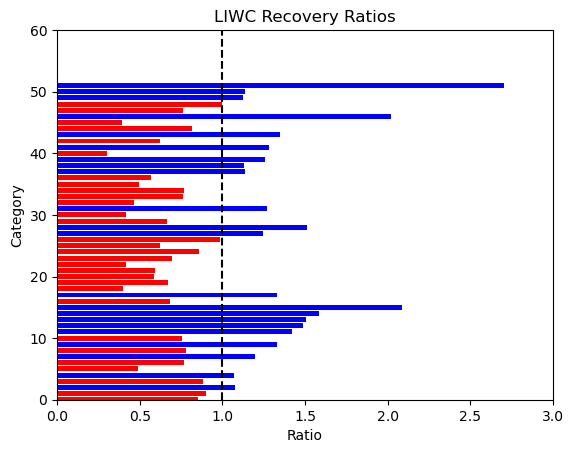

In [49]:
# visualize liwc ratios
# rec/dep

# line plot, cateogry on the y axis and ratio on the x axis. 1 at the center. red lines for ratios less than 1, blue for greater than 1

fig, ax = plt.subplots()
ax.axvline(x=1, color='black', linestyle='--')
# ax.axhline(y=0, color='black', linestyle='-')
ax.set_xlim(0, 3)
ax.set_ylim(0, 60)
ax.set_xlabel('Ratio')
ax.set_ylabel('Category')
ax.set_title('LIWC Recovery Ratios')
# ax.scatter([x[1] for x in liwc_ratio], [x[0] for x in liwc_ratio], color='black')
# for i in liwc_ratio:
#     if i[1] < 1:
#         ax.plot(i[1], i[0], 'ro')
#     else:
#         ax.plot(i[1], i[0], 'bo')
# violin plot centered at 1
for i in range(len(liwc_ratio)):
    if liwc_ratio[i][1] < 1:
       ax.barh(i, liwc_ratio[i][1], color='red')
    else:
        ax.barh(i, liwc_ratio[i][1], color='blue')

plt.show()



In [63]:
# recovery vs depedency
join_connection = disclosure_analysis.merge(inquisition_analysis, on='category', suffixes=('_inquisition', '_disclosure'), how='outer')
join_connection=join_connection[['category', 'ratio_inquisition', 'ratio_disclosure']]

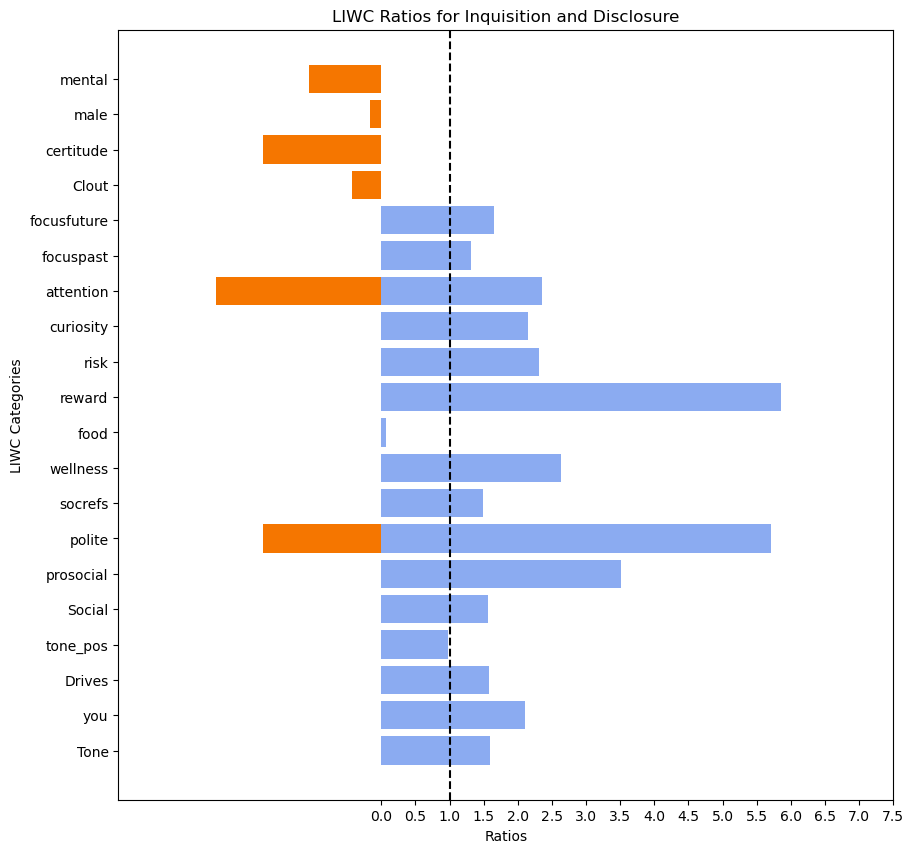

In [78]:
import seaborn as sns

# Set the figure size   
plt.figure(figsize=(10, 10))

y = range(len(join_connection))
labels = join_connection['category']
plt.yticks(y, labels)

plt.barh(y, width = join_connection['ratio_inquisition'], color='#8babf1')
plt.barh(y, width = -join_connection['ratio_disclosure'], color='#f57600')
plt.axvline(x=1, color='black', linestyle='--')

# Set x-axis limit to center at 1
xlim = max(abs(1 - join_connection['ratio_inquisition'].min()), abs(1 - join_connection['ratio_inquisition'].max()))
plt.xlim(1 - xlim, 1 + xlim)
# reset scale of x axis
plt.xticks(np.arange(0,8, 0.5))

# Set plot labels and title
plt.xlabel('Ratios')
plt.ylabel('LIWC Categories')
plt.title('LIWC Ratios for Inquisition and Disclosure')

# Show the plot
plt.show()